<a href="https://colab.research.google.com/github/Hruthika100/DS_PY_Writeups_2001610/blob/main/Exp04_notebook_2001610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment No : 04

##**Aim :** 
Learn use of maplotlib library as visualisation tool in data science pipeline to create contour plots, histograms and box plots.

## Performance : 

[Students need to execute each and every cell in this section and note the output of the same. Once done they have to answer Questions mentioned in review section]


### Density and Contour plots
Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.

There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.

We will see examples of this type of plot in section below

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

<ipython-input-1-9721c6b74aa7>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
# A 3D function to plot 

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.

The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.

Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

In [3]:
# x is set of 50 values between 0 and 5 
# x is set of 40 values between 0 and 5

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

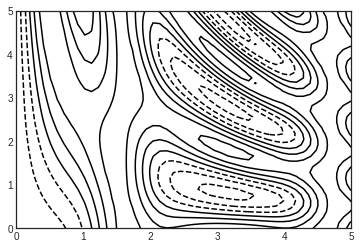

In [4]:
plt.contour(X, Y, Z, colors='black');

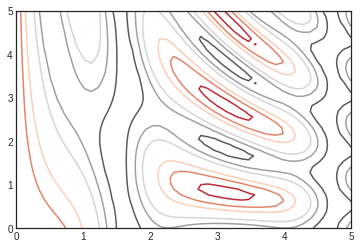

In [5]:
plt.contour(X, Y, Z, cmap='RdGy');

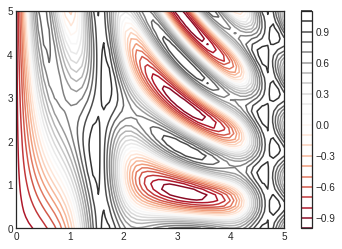

In [6]:
plt.contour(X, Y, Z, 20, cmap='RdGy');
plt.colorbar();

Answer Following Questions : 
1.   Explain what are the changes you observe in contour plots above 3 code cells ?
2.   What is size of X, Y and Z  respectively ?
3.   How does colorbar() method help in contour plot.

**1. Explain what are the changes you observe in contour plots above 3 code cells ?**

**Ans.**

**Cell 1** 

In cell 1 a single color is used for the plot, the dashed lines represent negative values and the solid lines represent positive values.

**Cell 2**

An alternative is to specify a colormap using the cmap argument. We can also specify more lines to be used in the plot with the levels argument

**Cell 3**

A filled contour plot is similar to a contour plot except that the spaces between the lines are filled.

The following code shows how to use the contourf() function to create a filled contour plot for the same data we used in the previous example:
We can also use the colorbar() function to add a labeled color bar next to the plot:

**2. What is size of X, Y and Z respectively ?**

**Ans**. The size of X, Y and Z is 2000 respectively

**3. How does colorbar() method help in contour plot.**

**Ans.**The colorbar() method is used to add a labeled color bar next to the contour plot

### Creating Smoother Contour Plots
One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.

This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

The following code shows how to perform this:

Things to remember while using ``imshow()``:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

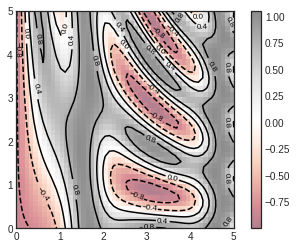

In [8]:
contours = plt.contour(X, Y, Z, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

Answer Following Questions : 
1.   What does alpha parameter do ?
2.   What does clabel method does ?
3.   Recreate above code block after, changing parameter 4 in contour fuction to 5 from 3. Explain what change you see in the plot.  

**1.What does alpha parameter do ?**

**Ans.** Matplotlib allows you to adjust the transparency of a graph plot using the alpha attribute.

By default, alpha=1

If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.

If you want to make the graph plot less transparent, then you can make alpha greater than 1. This solidifies the graph plot, making it less
transparent and more thick and dense, so to speak.

**2.What does clabel method does ?**

**Ans.** clabel(C,h) labels the current contour plot with rotated text inserted into each contour line. The contour lines must be long enough to fit the label, otherwise clabel does not insert a label. If you do not have the contour matrix C, then replace C with [].

clabel(C,h,v) labels the contour levels specified by vector v.

clabel(C,h,'manual') labels the locations you select with the mouse. Click the mouse or press the space bar to label the contour closest to the
center of the crosshair. Press the Return key while the cursor is within the figure window to terminate labeling.

t = clabel(C,h,'manual') returns the text objects created.

**3.Recreate above code block after, changing parameter 4 in contour fuction to 5 from 3. Explain what change you see in the plot.**

**Ans.**

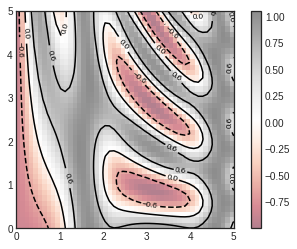

In [17]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5)
plt.colorbar();


### Histogram, Binning Plots

A histogram is a graphical representation of a grouped frequency distribution with continuous classes. It is an area diagram and can be defined as a set of rectangles with bases along with the intervals between class boundaries and with areas proportional to frequencies in the corresponding classes. In such representations, all the rectangles are adjacent since the base covers the intervals between class boundaries. The heights of rectangles are proportional to corresponding frequencies of similar classes and for different classes, the heights will be proportional to corresponding frequency densities.

In other words, a histogram is a diagram involving rectangles whose area is proportional to the frequency of a variable and width is equal to the class interval.

The histogram graph is used under certain conditions. They are:



*   The data should be numerical.
*   A histogram is used to check the shape of the data distribution. 
*   Used to check whether the process changes from one period to another.
*   Used to determine whether the output is different when it involves two or more processes.
*   Used to analyse whether the given process meets the customer requirements.



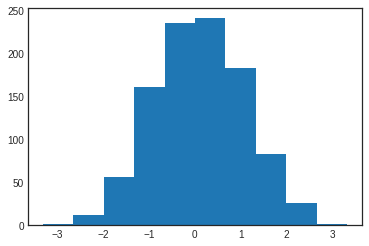

In [10]:
# How to plot histogram
data = np.random.randn(1000)
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

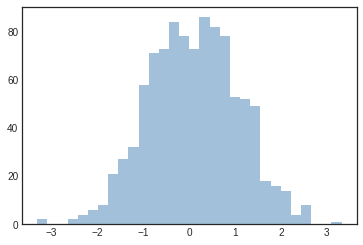

In [11]:
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

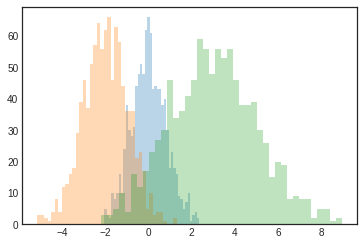

In [12]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [13]:
#Only storing histogram bin frequencies without ploting it
counts, bin_edges = np.histogram(data, bins=5)
print(counts,bin_edges)

[ 14 217 476 266  27] [-3.3146447  -1.9878981  -0.66115149  0.66559511  1.99234171  3.31908831]


### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

In [14]:
# Create 2 Variable normally distributed data sets with 10000 
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

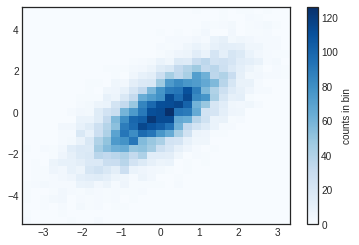

In [15]:
#Using 2d Histogram plot
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [ ]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

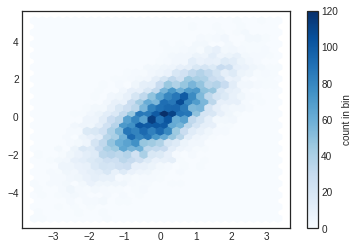

In [16]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

Questions:

1.  What is role of bins parameter in histogram plot? 
2.  Create a set of 10000 uniform random samples and store it in variable named *norm_data*. Draw histograms of *norm_data* with following bin counts 5, 50, 500, 5000.
3.  Explain your observations in text box of above step. 

**1. What is role of bins parameter in histogram plot? **

**Ans.** A histogram is a graphical representation of the distribution of data given by the user. Its appearance is similar to Bar-Graph except it is continuous.

The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range.
Width of each bin is = (max value of data – min value of data) / total number of bins

The default value of the number of bins to be created in a histogram is 10. However, we can change the size of bins using the parameter bins in
matplotlib.pyplot.hist().

**2. Create a set of 10000 uniform random samples and store it in variable named norm_data. Draw histograms of norm_data with following bin counts 5, 50, 500, 5000.**

**Ans**


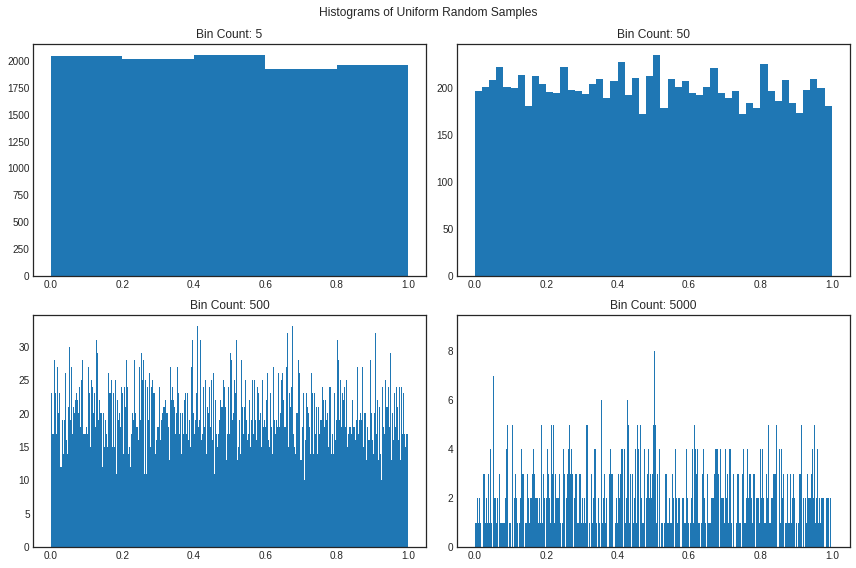

In [18]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
norm_data = np.random.uniform(size=10000)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
bin_counts = [5, 50, 500, 5000]
for i, ax in enumerate(axes):
  bins = bin_counts[i]
  ax.hist(norm_data, bins=bins)
  ax.set_title(f'Bin Count: {bins}')
fig.suptitle('Histograms of Uniform Random Samples')
plt.tight_layout()
plt.show()

**3.  Explain your observations in text box of above step.**

**Ans.** This code first creates an array of 10000 uniform random samples using the np.random.uniform() function, and stores it in the norm_data variable.

Then, it sets up a 2x2 grid of subplots using the subplots() function, and flattens the resulting array of axes into a 1D array for convenience

It then defines a list of four bin counts to use when plotting the histograms, and iterates over the list to plot a histogram with each bin count on a separate subplot.

Finally, it adds a title to the overall plot using suptitle(), and displays the plot using show().

When you run this code, you should see a figure with four subplots, each showing a histogram of the uniform random samples with a different
bin count. The histograms with fewer bins (e.g. 5) will have larger bins that capture a wider range of values, while the histograms with more bins

(e.g. 5000) will have smaller bins that capture more of the variation in the data.

### Ploting from a CSV File

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


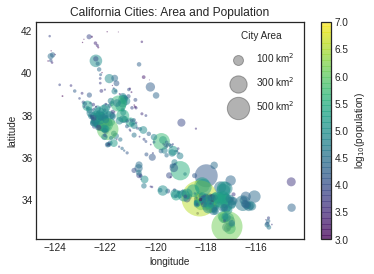

In [ ]:
# Path to file /content/drive/MyDrive/AIDS1 /notebooks/data/california_cities.csv

import pandas as pd
cities = pd.read_csv('/content/drive/MyDrive/AIDS1 /notebooks/data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

### Multiple Subplots
Sometimes it is helpful to compare different views of data side by side. Matplotlib has the concept of *subplots* : groups of smaller axes that can exist together within a single figure.

These subplots might be insets, grids of plots, or other more complicated layouts. 

In [ ]:
plt.style.use('seaborn-white')
import numpy as np

### ``plt.axes``: Subplots by Hand (Coding)

The most basic method of creating an axes is to use the ``plt.axes`` function. By default this creates a standard axes object that fills the entire figure.

``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent 
``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

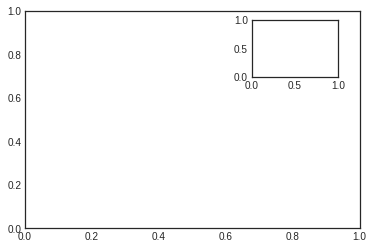

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.650, 0.650, 0.2, 0.2]) #inset axes

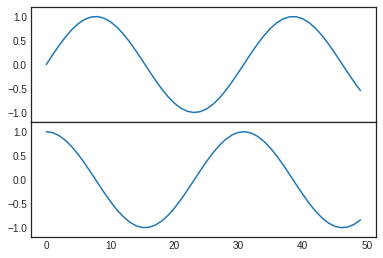

In [ ]:
#creating subplot using fig.add_axes
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.

The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.

As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

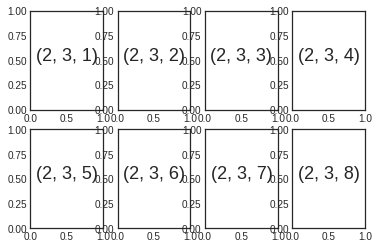

In [ ]:
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')


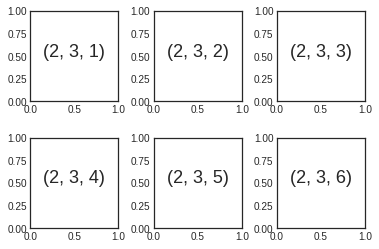

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

### ``plt.subplots``: The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

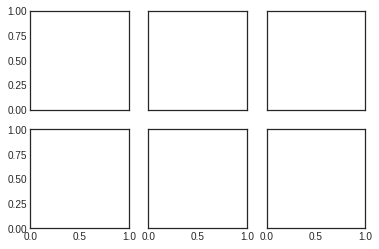

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.


The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

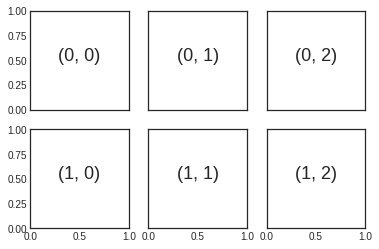

In [ ]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

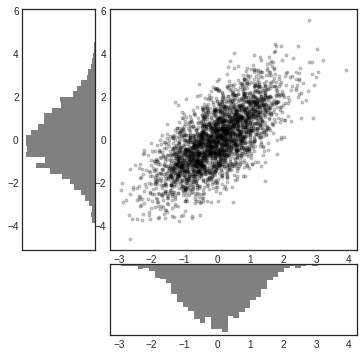

In [ ]:
# An example of Flexible grid arrangement
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()


In [ ]:
import matplotlib as mpl
# An example of Complex Plotting
births = pd.read_csv('/content/drive/MyDrive/AIDS1 /notebooks/data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


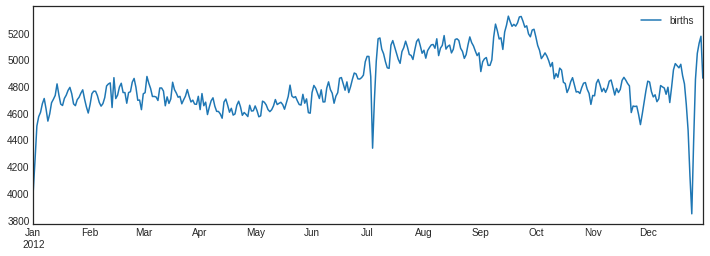

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

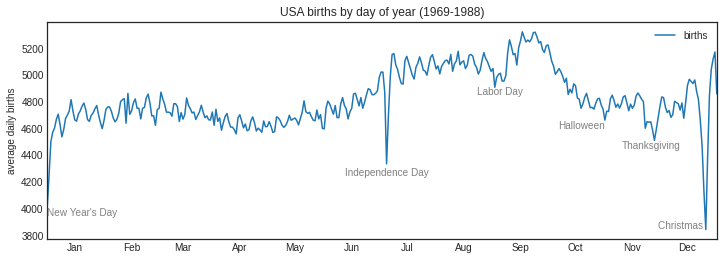

### Boxplot

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. 

In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.



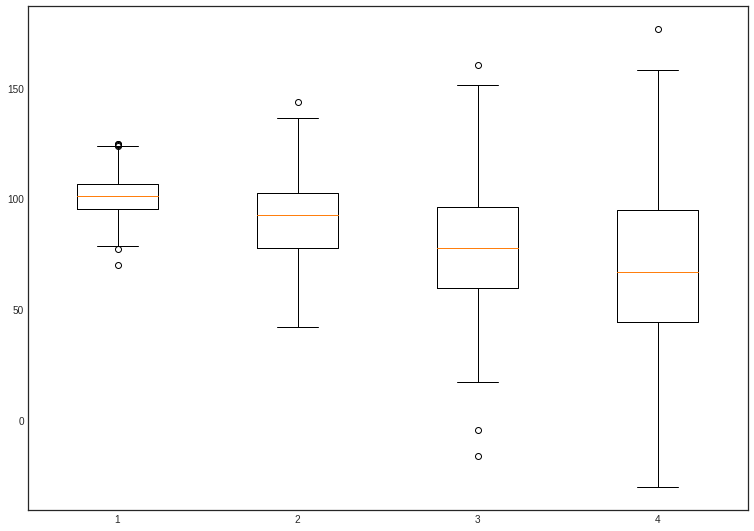

In [ ]:
#Exmple of Box plot for some random data sets
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()


Questions:

1. What is boxplot ?
2. What information do we get from a box plot?
3. How is minimum and maximum whisker's marked in a box plot ?
4. How to we identify that some points in data are outliers by viewing the box plot? 
5. Read a data file from your drive and for all numeric columns plot boxplot.


**1.What is boxplot ?**

**Ans.** A box plot which is also known as a whisker plot displays a summary of a set of data containing the minimum, first quartile, median, third
quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the
median.

**2.What information do we get from a box plot?**

**Ans.** Matplotlib's boxplot mainly provides a graphical summary of a data set with features such as minimum, first quartile, median, third
quartile, and maximum.

**Note:** A quartile is a statistical phrase for dividing observations into four predetermined intervals based on data values.
The "Whisker Plot" is another name for the "Box Plot."

The whiskers are the two lines that run from the minimum to the lower quartile (the box's beginning) and then from the higher quartile (the box's
end) to the maximum.

In the box plot, the box is drawn from the first to third quartiles, with a vertical line running through it at the median.
The x-axis of a box plot represents the data to be plotted, while the y-axis represents the frequency distribution.

Box plots are useful for visualizing the distribution of numerical values in a field. They come in handy for making comparisons across
categorical variables and spotting outliers, if any exist in a dataset.

**3.How is minimum and maximum whisker's marked in a box plot ?**

**Ans.**Example:Finding the five-number summary

A sample of raisins has these weigth (in grams)

25,28,29,29,30,34,35,35,37,38

**The min is the smallest data point, which is 25.**

**The max is the largest data point, which is 38.**

**The five-number summary is 25,29,32,35,38.**

A box and whisker plot. The beginning of the box is labeled Q 1 at 29. The end of the box is labeled Q 3 at 35. The vertical line that divides the
box is labeled median at 32. The left part of the whisker is labeled min at 25. The right part of the whisker is labeled max 38.

**4.How to we identify that some points in data are outliers by viewing the box plot?**

**Ans.**Outliers are the data points that differ from other observations or those which lie at a distance from the other data. They are mainly
generated due to some experimental error which may cause several problems in statistical analysis. While in a big dataset it is quite obvious
that some data will be further from the sample mean. These outliers need to be found and handle wisely.

Box plots are a graphical depiction of numerical data through their quantiles. It is a very simple but effective way to visualize outliers. Think
about the lower and upper whiskers as the boundaries of the data distribution. Any data points that show above or below the whiskers, can be
considered outliers or anomalous. Here is the code to plot a box plot:


In [21]:
# Adding libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# random integers between 1 to 20
arr = np.random.randint(1, 20, size=30)
# two outliers taken
arr1 = np.append(arr, [27, 30])
print('Thus the array becomes{}'.format(arr1))

Thus the array becomes[ 4 18  5 16 14 19 14  9  6 17 19 12  4 16 11  4 17  8 14  2 11 11  6 14
 10  8  7  8  8  2 27 30]


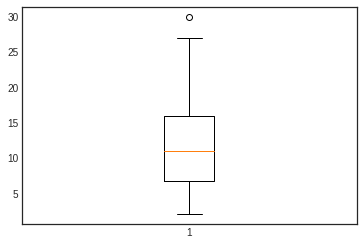

<Figure size 720x504 with 0 Axes>

In [22]:
plt.boxplot(arr1)
fig = plt.figure(figsize =(10, 7))
plt.show()

**5. Read a data file from your drive and for all numeric columns plot boxplot.**

**Ans.**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


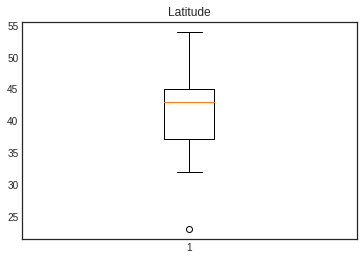

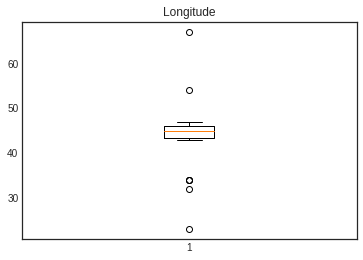

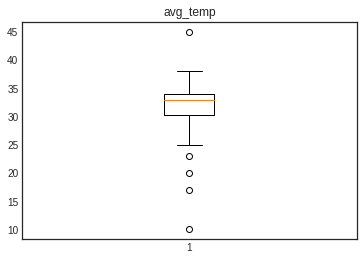

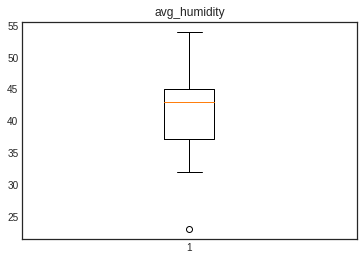

In [29]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt

#Read data from file
data = pd.read_csv('/content/drive/MyDrive/weather.csv')

#Create boxplots for all numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
      plt.boxplot(data[col])
      plt.title(col)
      plt.show()




## Conclusion
Thus we have learned about basics of  Contour plots, Histograms, Box plots. 